In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews.csv


In [ ]:
# install packages
!pip install tweet-preprocessor
!pip install contractions
!pip install nltk
!pip install WordCloud

In [ ]:
# Load library packages
import pandas as pd
import numpy as np

import re
import preprocessor as p
import contractions
import string

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import itertools
import collections

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Load the data
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [ ]:
df.head()

Unnamed: 0  Clothing ID  Age  ...   Division Name Department Name  Class Name
0           0          767   33  ...       Initmates        Intimate   Intimates
1           1         1080   34  ...         General         Dresses     Dresses
2           2         1077   60  ...         General         Dresses     Dresses
3           3         1049   50  ...  General Petite         Bottoms       Pants
4           4          847   47  ...         General            Tops     Blouses

[5 rows x 11 columns]

In [ ]:
# Explore the data content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
# Remove missing value by row deletion
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               19662 non-null  int64 
 1   Clothing ID              19662 non-null  int64 
 2   Age                      19662 non-null  int64 
 3   Title                    19662 non-null  object
 4   Review Text              19662 non-null  object
 5   Rating                   19662 non-null  int64 
 6   Recommended IND          19662 non-null  int64 
 7   Positive Feedback Count  19662 non-null  int64 
 8   Division Name            19662 non-null  object
 9   Department Name          19662 non-null  object
 10  Class Name               19662 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.8+ MB


In [ ]:
df["Recommended IND"].value_counts()

1    16087
0     3575
Name: Recommended IND, dtype: int64

In [ ]:
# sample 200 data
df_sub2 = df.sample(n=200,random_state=12)
df_sub2["Rating"].value_counts()

# not equally distributed. more comments towards positive ratings

5    110
4     43
3     24
2     16
1      7
Name: Rating, dtype: int64

In [ ]:
comment_document2 = df_sub2["Review Text"].values.astype("U")
comment_document2

array(["I wanted to love this skirt but i got it today and i just was a little disappointed...i read all the reviews but i found it ran small and really fitted not straight pencil like on the model! it is a knit...and it looked like cotton...has a lot of give but it hangs a little weird. the panel in the front doesn't lie flat and looks a little funky! the colors in the skirt look exactly like the picture on line so that was good... i liked it but didn't love it and for $98.00 i want to love it! i am be",
       'The only strange thing is the size. i used to wear size s (117bl) but this time the small is way too big. i still keep it and put a belt on. it is a very very pretty dress. i used to buy sale from antheropologie. but can not wait this time. i am very impressed by the design. can not praise more!',
       "This sweater looks exactly as represented in the picture. the detail on the cuffs, neckline and hemline make it unique and set it apart from the typical patterned sweater. i'

Text Preprocessing


In [ ]:
#test2
first5 = comment_document2[:5]
first5

array(["I wanted to love this skirt but i got it today and i just was a little disappointed...i read all the reviews but i found it ran small and really fitted not straight pencil like on the model! it is a knit...and it looked like cotton...has a lot of give but it hangs a little weird. the panel in the front doesn't lie flat and looks a little funky! the colors in the skirt look exactly like the picture on line so that was good... i liked it but didn't love it and for $98.00 i want to love it! i am be",
       'The only strange thing is the size. i used to wear size s (117bl) but this time the small is way too big. i still keep it and put a belt on. it is a very very pretty dress. i used to buy sale from antheropologie. but can not wait this time. i am very impressed by the design. can not praise more!',
       "This sweater looks exactly as represented in the picture. the detail on the cuffs, neckline and hemline make it unique and set it apart from the typical patterned sweater. i'

In [ ]:
import re

In [ ]:
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p

In [ ]:
# text cleaning using preprocessor library (on Title)
df_sub2["Title_clean1"]= df_sub2["Title"].apply(p.clean)
df_sub2.loc[:,"Title_clean1"].sample(10)

6676                                     Unique jeans
18899                     Great summer dress or shirt
6907                            Polo shirt with twist
18827      Online photos don't do this dress justice!
22971                               Big, boxy sweater
10       Dress looks like it's made of cheap material
23192                                         Love!!!
10938                                Pretty but short
5636                                     Breathtaking
10154                                        So cute!
Name: Title_clean1, dtype: object

In [ ]:
#checking
dfz2 = df_sub2[df_sub2["Title_clean1"].str.contains("thth")]
dfz2.loc[:,"Title_clean1"].sample(10)

ValueError: ignored

In [ ]:
# text cleaning using preprocessor library (on Review Text)
df_sub2["Review Text_clean1"]= df_sub2["Review Text"].apply(p.clean)
df_sub2.loc[:,"Review Text_clean1"].sample(10)

15406    I haven't gotten a dress from retailer in a lo...
18407    I so wanted this blouse to work. the lacework ...
7768     I absolutely love the look & style of this pie...
923      Really loved this - so soft and snuggly. was u...
3937     Perfect for dressing up or dressing down with ...
8931     This blouse is adorable! very flattering wrap ...
19275    This looked like a simple, chic blouse, but th...
17307    I bought this shirt in white and am happy with...
19396    I ordered this online which is always a gamble...
20638    Well, i totally disagree with the previous rev...
Name: Review Text_clean1, dtype: object

In [ ]:
dfz2 = df_sub2[df_sub2["Review Text_clean1"].str.contains("thth")]
dfz2.loc[:,"Review Text_clean1"].sample(10)

ValueError: ignored

In [ ]:
p.clean("This is all around, a pretty feminine take on")

'This is all around, a pretty feminine take on'

In [ ]:
cleaning_tweet2("This is all around, a pretty feminine take on")

'this is all around  a pretty feminine take on'

In [ ]:
#checking
#re.sub(r'(.)\1+', r'\1\1', "pretty and feminine") # replace word repetition
#re.sub(r'[\?\.\!]+(?=[\?\.\!])', "", "pretty and feminine")
#re.sub(r'[^\w\s]', " ", "well-rounded feminine") # remove punctuations
re.sub(r'\n', " ", "pretty and feminine") # replace line breaks with whitespace

#tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', "", tweet) # replace punctuation repetition
#tweet = re.sub(r'[^\w\s]', "", tweet) # remove punctuations
#tweet = re.sub(r'\n', " ", tweet) # replace line breaks with whitespace
#tweet = re.sub(r'(.)\1+', r'\1\1', tweet) # replace word repetition

#fix_contractions("pretty and feminine")

'pretty and feminine'

In [ ]:
#p.clean("pretty and feminine")
cleaning_tweet2("pretty and feminine")

'pretty and feminine'

In [ ]:
import contractions

In [ ]:
# drop "em" from contraction dictionary
contractions.contractions_dict.pop('em', None)

In [ ]:
contractions.contractions_dict

{"'cause": 'because',
 "'tis": 'it is',
 "'twas": 'it was',
 "I'd": 'I would',
 "I'd've": 'I would have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'm": 'I am',
 "I'm'a": 'I am about to',
 "I'm'o": 'I am going to',
 "I've": 'I have',
 'I’d': 'I would',
 'I’d’ve': 'I would have',
 'I’ll': 'I will',
 'I’ll’ve': 'I will have',
 'I’m': 'I am',
 'I’m’a': 'I am about to',
 'I’m’o': 'I am going to',
 'I’ve': 'I have',
 'Whatcha': 'What are you',
 "ain't": 'are not',
 'ain’t': 'are not',
 "amn't": 'am not',
 'amn’t': 'am not',
 'apr.': 'april',
 "aren't": 'are not',
 'aren’t': 'are not',
 'aug.': 'august',
 "can't": 'cannot',
 "can't've": 'cannot have',
 'can’t': 'cannot',
 'can’t’ve': 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 'couldn’t': 'could not',
 'couldn’t’ve': 'could not have',
 'could’ve': 'could have',
 "daren't": 'dare not',
 'daren’t': 'dare not',
 "daresn't": 'dare not',
 'daresn’t': 'dare not',
 "dasn't": 'dare no

In [ ]:
dfz2 = df_sub2[df_sub2["Review Text"].str.contains("feminine")]
dfz2.loc[:,"Review Text"].sample(10)

ValueError: ignored

In [ ]:
df_sub2[["Title_clean1","Review Text_clean1"]].head()

Title_clean1                                 Review Text_clean1
12785                 Cute pencil  I wanted to love this skirt but i got it today...
7361     This is very pretty one!  The only strange thing is the size. i used to ...
7625          Unique, cute piece!  This sweater looks exactly as represented in t...
6411   Great light weight sweater  Great green color. drapes well. nice gray deta...
5382                   Runs small  Should have ordered the xl instead of the larg...

In [ ]:
!pip install contractions

In [ ]:
# import packages
import contractions
import string

In [ ]:
# drop "em" from contraction dictionary
contractions.contractions_dict.pop('em', None)

def fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k, v)
  return tweet

In [ ]:
# standard text removal procedure

def cleaning_tweet2(tweet):

 tweet = tweet.replace("\d+", "") # removes Numbers
 tweet = tweet.lower() # lower case
 tweet = fix_contractions(tweet) # replace contractions
 tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', "", tweet) # replace punctuation repetition
 tweet = re.sub(r'[^\w\s]', " ", tweet) # remove punctuations
 tweet = re.sub(r'\n', " ", tweet) # replace line breaks with whitespace
 tweet = re.sub(r'(.)\1+', r'\1\1', tweet) # replace word repetition

 return tweet


In [ ]:
# apply additional cleaning process to each row of dataframe
df_sub2["Review Text_clean2"]= df_sub["Review Text_clean2"].apply(cleaning_tweet2) # use .apply()
df_su2["Title_clean2"]= df_sub["Title_clean2"].apply(cleaning_tweet2)
df_sub2[["Title_clean2","Review Text_clean2"]].head(10)

Title_clean1                                 Review Text_clean1
12785                 cute pencil  i wanted to love this skirt but i got it today...
7361     this is very pretty one   the only strange thing is the size  i used to ...
7625          unique  cute piece   this sweater looks exactly as represented in t...
6411   great light weight sweater  great green color  drapes well  nice gray deta...
5382                   runs small  should have ordered the xl instead of the larg...
9445         cute and comfortable  this has become a go to work staple in my clos...
7877        spirit of sea sprites  very much in love with this ethereal  delicate...
15837              so super soft   this is great and very soft inside  i am weari...
17493             i like this one  i tried on the xs in the store and decided to ...
23192                       love   i love this kimono  it fits great  and is gorg...

In [ ]:
dfz2 = df_sub2[df_sub2["Title_clean2"].str.contains("feminine")]
dfz2.loc[:,"Title_clean2"].sample(10)

ValueError: ignored

In [ ]:
# for checking irregular tokens
df_text2 = df_sub2[["Title_clean2","Review Text_clean2"]]
df_text2[df_text2["Review Text_clean2"].str.contains("thth")]

Empty DataFrame
Columns: [Title_clean1, Review Text_clean1]
Index: []

Tokenization

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def tokenize_tweet(tweet):
  tokens = word_tokenize(tweet)
  return tokens

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
snowball_stemmer = SnowballStemmer('english')

In [ ]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [ ]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):

  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation] # remove punctuation

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()] # remove alphabet

  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not') # include negation
    token_list = [token for token in token_list if not token in stop_words] # remove stopwords

  return token_list

In [ ]:
def token_all(tweet):

  # Tokenization and Stemming
  token = custom_tokenize(tweet, keep_punct=False,keep_stop=False,keep_alnum=False)
  stemmer = SnowballStemmer("english")
  stem = stem_tokens(token, stemmer)

  return stem

In [ ]:
# drop original columns "Title" and "Review Text"
df_sub2.drop(["Title","Review Text"],axis=1,inplace=True)
df_sub2.head()

Unnamed: 0  ...                                 Review Text_clean1
12785       12785  ...  i wanted to love this skirt but i got it today...
7361         7361  ...  the only strange thing is the size  i used to ...
7625         7625  ...  this sweater looks exactly as represented in t...
6411         6411  ...  great green color  drapes well  nice gray deta...
5382         5382  ...  should have ordered the xl instead of the larg...

[5 rows x 11 columns]

In [ ]:
# apply tokenize and stemming process to each row of Title and Review Text
df_sub2["title_tokens2"]= df_sub2["Title_clean2"].apply(token_all)
df_sub2["text_tokens2"]= df_sub2["Review Text_clean2"].apply(token_all)
df_sub2.head()

Unnamed: 0  ...                                        text_tokens
12785       12785  ...  [want, love, skirt, got, today, littl, disappo...
7361         7361  ...  [strang, thing, size, use, wear, size, time, s...
7625         7625  ...  [sweater, look, exact, repres, pictur, detail,...
6411         6411  ...  [great, green, color, drape, well, nice, gray,...
5382         5382  ...  [order, xl, instead, larg, not, even, come, cl...

[5 rows x 13 columns]

In [ ]:
# Step 3: Data preprocessing
# use Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

Vectorization on Title

In [ ]:
# build TFiDF vectorizer with corpus
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

In [ ]:
# transform corpus into matrix
tf_vect2 = fit_tfidf(df_sub2["title_tokens2"])
tf_mtx2 = tf_vect2.transform(df_sub2["title_tokens2"])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
tf_vect2

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2',
                preprocessor=<function fit_tfidf.<locals>.<lambda> at 0x7fbe59e410e0>,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function fit_tfidf.<locals>.<lambda> at 0x7fbe59d61050>,
                use_idf=True, vocabulary=None)

In [ ]:
tf_mtx2

<200x226 sparse matrix of type '<class 'numpy.float64'>'
	with 482 stored elements in Compressed Sparse Row format>

In [ ]:
tf_mtx2.shape

(200, 226)

In [ ]:
# get feature names of Title (matrix columns)
feature2 = tf_vect2.get_feature_names()
print(len(feature2), " features", feature2)

226  features ['absolut', 'ador', 'airi', 'altern', 'amaz', 'appeal', 'around', 'awesom', 'basic', 'beauti', 'beautigul', 'best', 'better', 'bewar', 'beyond', 'big', 'bit', 'blous', 'bore', 'bottom', 'boxey', 'boxi', 'breastfeed', 'breathtak', 'broad', 'candi', 'cardigan', 'casual', 'cheap', 'chest', 'chic', 'close', 'coat', 'collar', 'color', 'comfi', 'comfort', 'cosi', 'could', 'cozi', 'curvi', 'cut', 'cute', 'darl', 'delic', 'deliv', 'design', 'detach', 'detail', 'disappoint', 'done', 'dream', 'dress', 'earli', 'easi', 'eh', 'eleg', 'embroidari', 'even', 'expect', 'eye', 'fabric', 'fabul', 'favorit', 'felt', 'femenin', 'femin', 'feminin', 'fenc', 'fever', 'find', 'first', 'fit', 'flare', 'flatter', 'flirti', 'fourth', 'fray', 'friend', 'fun', 'funni', 'georgeous', 'girl', 'good', 'gorgeous', 'great', 'hem', 'hip', 'horribl', 'huge', 'idea', 'interest', 'issu', 'itchi', 'jacket', 'jean', 'juli', 'jumpsuit', 'justic', 'lace', 'larg', 'last', 'light', 'lightweight', 'like', 'line', 'li

Vectorization for Review Text

In [ ]:
# transform corpus into matrix
tf_vect2 = fit_tfidf(df_sub["text_tokens"])
tf_mtx2 = tf_vect2.transform(df_sub["text_tokens"])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
tf_mtx2.shape

(200, 1225)

In [ ]:
# get feature names of Title (matrix columns)
feature2 = tf_vect2.get_feature_names()
print(len(feature2), " features", feature2)

1225  features ['abl', 'absolut', 'abt', 'accent', 'accept', 'accessori', 'accur', 'across', 'acryl', 'actual', 'add', 'addit', 'adjust', 'admir', 'adn', 'ador', 'afford', 'afraid', 'ag', 'agre', 'air', 'airi', 'airport', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also', 'alter', 'altern', 'although', 'alway', 'amaz', 'ampl', 'ankl', 'anoth', 'antheropologi', 'anymor', 'anyon', 'anyth', 'anyway', 'apart', 'appeal', 'appear', 'appreci', 'appropri', 'area', 'arm', 'armho', 'armpit', 'around', 'arrang', 'arriv', 'arti', 'asid', 'asylum', 'athlet', 'attach', 'avail', 'averag', 'avoid', 'awar', 'away', 'awesom', 'awhil', 'awkward', 'b', 'babi', 'bac', 'back', 'background', 'bad', 'bag', 'baggi', 'baggier', 'balanc', 'band', 'base', 'basic', 'bc', 'bead', 'beauti', 'becom', 'bee', 'begin', 'beig', 'bejewel', 'believ', 'belli', 'belt', 'bend', 'ber', 'best', 'better', 'beyond', 'big', 'bigger', 'biggest', 'billow', 'billowi', 'bit', 'black', 'blazer', 'blend', 'blond', 'blous', 'blousey'

In [ ]:
#skip this
#from example code
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(first5)
features

<5x103 sparse matrix of type '<class 'numpy.float64'>'
	with 113 stored elements in Compressed Sparse Row format>

Elbow Method (for Title)

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

In [ ]:
import matplotlib.pyplot as plt

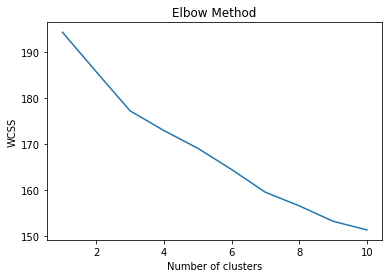

In [ ]:
from sklearn.cluster import KMeans
wcss = []
# iterate within 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans.fit(tf_mtx1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# up to 11 cluster
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(tf_mtx1)
    label = kmeans.labels_
    sil_coeff = silhouette_score(tf_mtx1, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.037001782734339385
For n_clusters=3, The Silhouette Coefficient is 0.05304243353803555
For n_clusters=4, The Silhouette Coefficient is 0.06019960648529686
For n_clusters=5, The Silhouette Coefficient is 0.07494488039549509
For n_clusters=6, The Silhouette Coefficient is 0.07685764470286348
For n_clusters=7, The Silhouette Coefficient is 0.08772181821877051
For n_clusters=8, The Silhouette Coefficient is 0.10017808745147676
For n_clusters=9, The Silhouette Coefficient is 0.09491502716531616
For n_clusters=10, The Silhouette Coefficient is 0.09022092791560742


Hierarchical Clustering

In [ ]:
# skip this
import scipy.cluster.hierarchy as sch

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
dist1 = 1 - cosine_similarity(tf_mtx1)
print(dist1)

[[ 0.00000000e+00  1.00000000e+00  7.93306109e-01 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 7.93306109e-01  1.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 ...
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ... -2.22044605e-16
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  0.00000000e+00]]


In [ ]:
df_sub2.Title_clean2.to_list()

['cute pencil',
 'this is very pretty one ',
 'unique  cute piece ',
 'great light weight sweater',
 'runs small',
 'cute and comfortable',
 'spirit of sea sprites',
 'so super soft ',
 'i like this one',
 'love ',
 'beautiful top ',
 'lovely pattern',
 'close  but not quite ',
 'fit is funny ',
 'really small',
 'feminine appeal',
 'pills horribly',
 'stunning lace top',
 'just what i was looking for ',
 'darling top ',
 'love this dress ',
 'lovely ',
 'beautiful relaxed sweatshirt',
 'very comfortable fabric  great color details',
 'gorgeous',
 'so cute ',
 'too much fabric',
 'lovely interesting white top',
 'pretty  femine',
 'love love love ',
 'did not meet my expectations',
 'pretty detail',
 'talk about flattering',
 'soft and easy',
 'itchy and oversized',
 'unique jeans',
 'a lovely basic top',
 'amazing ',
 'so beautifully done ',
 'unique',
 'comfy and pretty',
 'had potential but it does not deliver',
 'mixed review',
 'runs large',
 'stunning ',
 'so cute ',
 'lovely top

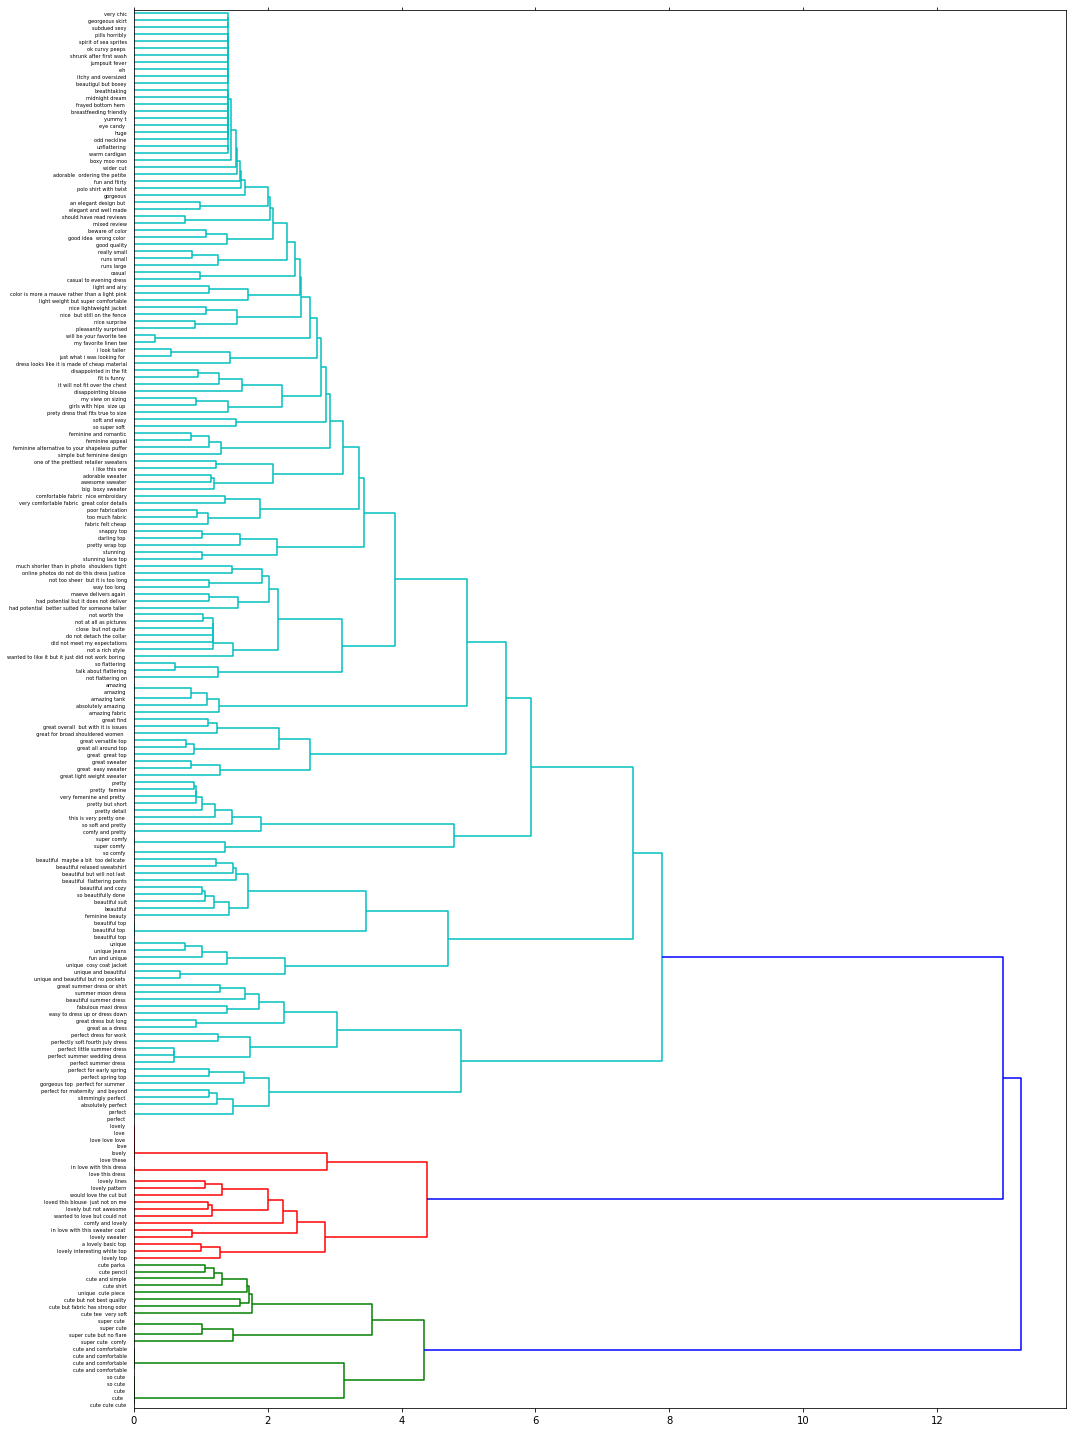

In [ ]:
# try code (for Titles)
linkage_matrix2 = ward(dist2) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix2, orientation="right", labels=df_sub2.Title_clean2.to_list()); # label in list format

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

Elbow Method (Review Text)

In [ ]:
# this may take longer to run
# 5000 comments to process takes about 8-10 minutes

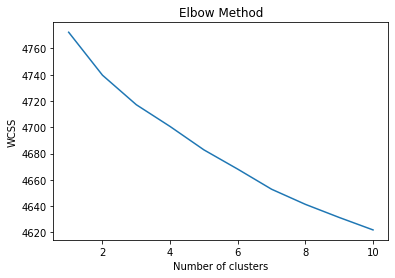

In [ ]:
wcss = []
# iterate within 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans.fit(tf_mtx2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# up to 11 cluster
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(tf_mtx2)
    label = kmeans.labels_
    sil_coeff = silhouette_score(tf_mtx2, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.005365847734266923
For n_clusters=3, The Silhouette Coefficient is 0.004910298099074136
For n_clusters=4, The Silhouette Coefficient is 0.006324491835763743
For n_clusters=5, The Silhouette Coefficient is 0.006309792180706421
For n_clusters=6, The Silhouette Coefficient is 0.006572290859936791
For n_clusters=7, The Silhouette Coefficient is 0.0075206081788521005
For n_clusters=8, The Silhouette Coefficient is 0.0073902381489960615
For n_clusters=9, The Silhouette Coefficient is 0.007993878762973762
For n_clusters=10, The Silhouette Coefficient is 0.0077927163717101365


Cluster for Title

In [ ]:
# elbow shape at cluster number 2 or 5. select k = 5 to start clustering
k1 = 5  #no. of the cluster
model1 = KMeans(n_clusters=k1, init='k-means++', max_iter=400, n_init=1,random_state=10)
model1.fit(tf_mtx1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=400,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [ ]:
df_sub['cluster_title'] = model1.labels_

In [ ]:
df_sub.head()

Unnamed: 0  ...  cluster_title
12785       12785  ...              2
7361         7361  ...              0
7625         7625  ...              2
6411         6411  ...              0
5382         5382  ...              0

[5 rows x 14 columns]

In [ ]:
#clusters

df_sub.reset_index(drop=True,inplace=True) # reset index
df_sub.head()

Unnamed: 0  ...  cluster_title
0       12785  ...              2
1        7361  ...              0
2        7625  ...              2
3        6411  ...              0
4        5382  ...              0

[5 rows x 14 columns]

In [ ]:
# Step 5: Evaluate the results
print("Cluster centroids: \n")
order_centroids1 = model1.cluster_centers_.argsort()[:, ::-1]
terms1 = tf_vect1.get_feature_names()

for i in range(k1):
    print("Cluster %d:" % i)
    for j in order_centroids1[i, :10]: #print out 10 important feature terms of each cluster
        print (' %s' % terms1[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 love
 beauti
 great
 top
 not
 pretti
 nice
 fit
 gorgeous
 color
------------
Cluster 1:
 comfort
 cute
 flatter
 beauti
 super
 style
 top
 soft
 dress
 fabric
------------
Cluster 2:
 cute
 super
 top
 comfi
 not
 shirt
 realli
 tee
 summer
 casual
------------
Cluster 3:
 perfect
 summer
 dress
 fall
 fit
 sweater
 top
 jean
 season
 skirt
------------
Cluster 4:
 dress
 love
 beauti
 great
 cute
 summer
 gorgeous
 nice
 easi
 not
------------


Cluster for Review Text

In [ ]:
# result not significant on elbow method. but, based on silheoutte, increase of coefficient value at 5 clusters at bigger margin. select k = 5 to start clustering
k2 = 5  #no. of the cluster
model2 = KMeans(n_clusters=k2, init='k-means++', max_iter=400, n_init=1)
model2.fit(tf_mtx2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=400,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df_sub['cluster_reviewtext'] = model2.labels_

In [ ]:
df_sub.head()

Unnamed: 0  Clothing ID  ...  cluster_title  cluster_reviewtext
0       12785         1008  ...              2                   0
1        7361         1077  ...              0                   3
2        7625          895  ...              2                   2
3        6411          895  ...              0                   2
4        5382          985  ...              0                   3

[5 rows x 15 columns]

In [ ]:
# Step 5: Evaluate the results
print("Cluster centroids: \n")
order_centroids2 = model2.cluster_centers_.argsort()[:, ::-1]
terms2 = tf_vect2.get_feature_names()

for i in range(k1):
    print("Cluster %d:" % i)
    for j in order_centroids2[i, :10]: #print out 10 important feature terms of each cluster
        print (' %s' % terms2[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 not
 like
 top
 look
 fabric
 would
 fit
 love
 realli
 color
------------
Cluster 1:
 great
 love
 jean
 shirt
 fit
 color
 perfect
 comfort
 wear
 top
------------
Cluster 2:
 sweater
 not
 love
 look
 wear
 color
 soft
 fit
 great
 sleev
------------
Cluster 3:
 size
 small
 fit
 order
 top
 run
 medium
 not
 larg
 usual
------------
Cluster 4:
 dress
 not
 love
 fit
 perfect
 wear
 size
 look
 like
 beauti
------------


Visualization

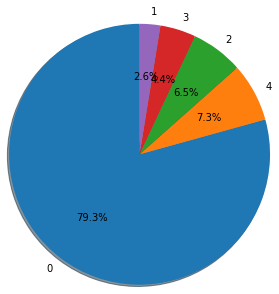

In [ ]:
# data visualization with pie chart (Title)
cluster_count1 = df_sub["cluster_title"].value_counts()
plt.pie(cluster_count1, labels=cluster_count1.index, autopct="%1.1f%%",shadow=True,startangle=90, radius=1.5)
#plt.legend(title="Cluster Distribution for Review Title")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Review Title by Clusters')

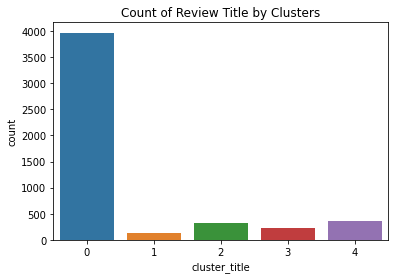

In [ ]:
import seaborn as sns
sns.countplot(df_sub['cluster_title'],label = 'count')
plt.title("Count of Review Title by Clusters")

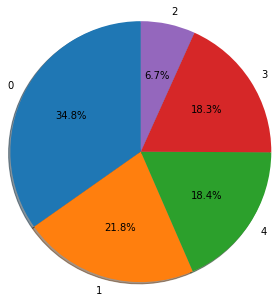

In [ ]:
# data visualization with pie chart (Review_Text)
cluster_count2 = df_sub["cluster_reviewtext"].value_counts()
plt.pie(cluster_count2, labels=cluster_count2.index, autopct="%1.1f%%",shadow=True,startangle=90, radius=1.5)
#plt.legend(title="Cluster Distribution for Review Text")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Review Text by Clusters')

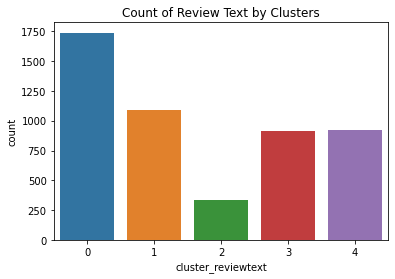

In [ ]:
sns.countplot(df_sub['cluster_reviewtext'],label = 'count')
plt.title("Count of Review Text by Clusters")

In [ ]:
!pip install WordCloud
from wordcloud import WordCloud

In [ ]:
# document clustering
# subset data of clusters belong to "Title" (0-4)
clust_title0 = df_sub[df_sub['cluster_title']== 0]
clust_title1 = df_sub[df_sub['cluster_title']== 1]
clust_title2 = df_sub[df_sub['cluster_title']== 2]
clust_title3 = df_sub[df_sub['cluster_title']== 3]
clust_title4 = df_sub[df_sub['cluster_title']== 4]

# subset data of clusters belong to "Review Text" (0-4)
clust_text0 = df_sub[df_sub['cluster_reviewtext']== 0]
clust_text1 = df_sub[df_sub['cluster_reviewtext']== 1]
clust_text2 = df_sub[df_sub['cluster_reviewtext']== 2]
clust_text3 = df_sub[df_sub['cluster_reviewtext']== 3]
clust_text4 = df_sub[df_sub['cluster_reviewtext']== 4]

In [ ]:
# check
clust_title0.head()

Unnamed: 0  Clothing ID  ...  cluster_title  cluster_reviewtext
1        7361         1077  ...              0                   3
3        6411          895  ...              0                   2
4        5382          985  ...              0                   3
6        7877         1110  ...              0                   3
7       15837          328  ...              0                   1

[5 rows x 15 columns]

In [ ]:
# check
clust_text0.head()

Unnamed: 0  Clothing ID  ...  cluster_title  cluster_reviewtext
0        12785         1008  ...              2                   0
11        5058         1095  ...              0                   0
13       13275          903  ...              0                   0
16        2252          129  ...              0                   0
25       10154          829  ...              2                   0

[5 rows x 15 columns]

WordCloud (Title)

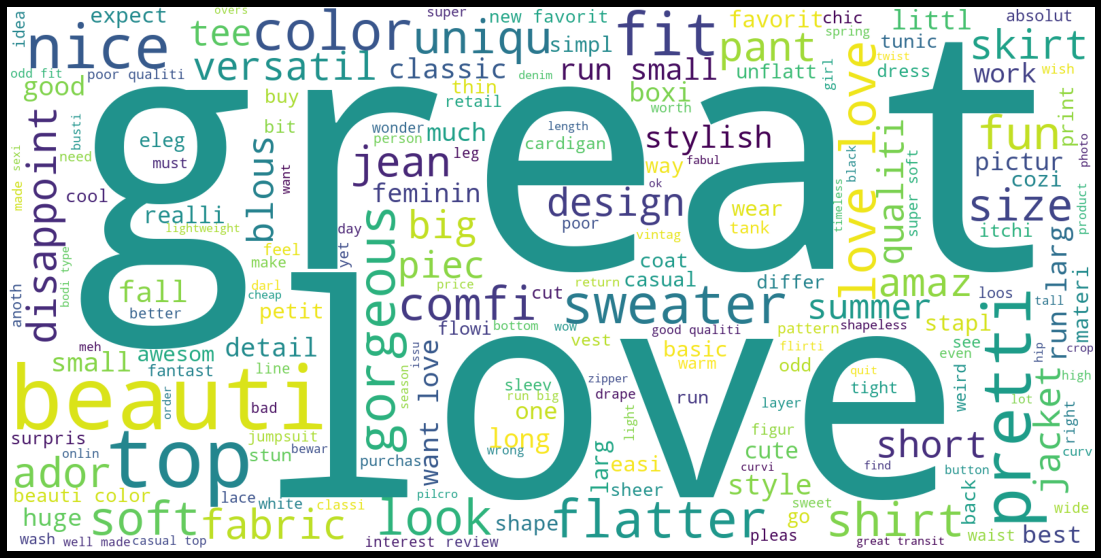

In [ ]:
clust0_titlelist = [item for sublist in clust_title0["title_tokens"] for item in sublist]
clust0_title_bow = ' '.join(clust0_titlelist)
plt.figure(figsize=(20,10),facecolor="k")
plt.imshow(WordCloud(background_color="white",colormap="viridis",width=1600, height=800).generate(clust0_title_bow))
plt.axis("off")
plt.show()

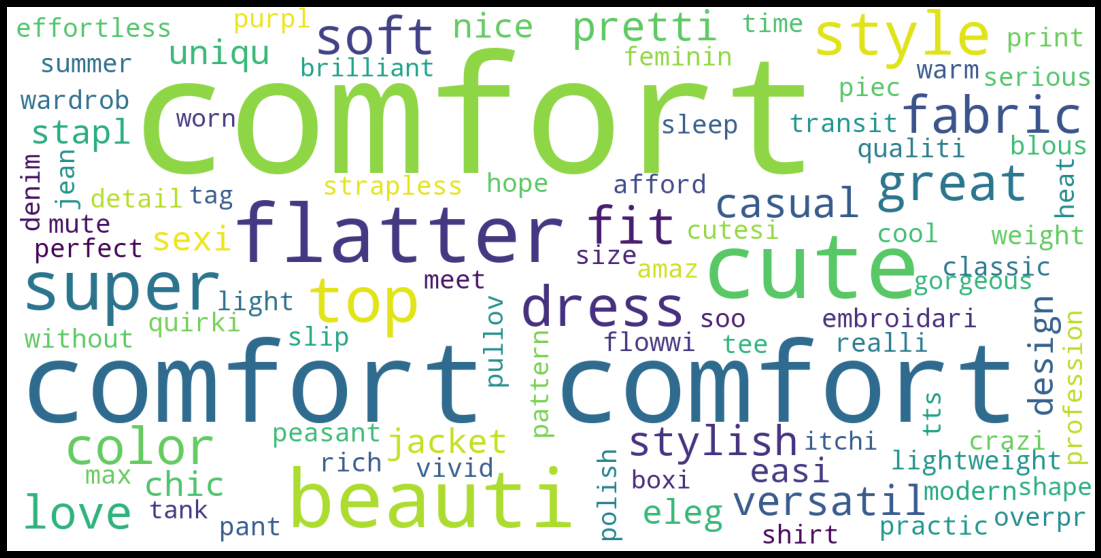

In [ ]:
clust1_titlelist = [item for sublist in clust_title1["title_tokens"] for item in sublist]
clust1_title_bow = ' '.join(clust1_titlelist)
plt.figure(figsize=(20,10),facecolor="k")
plt.imshow(WordCloud(background_color="white",colormap="viridis",width=1600, height=800).generate(clust1_title_bow))
plt.axis("off")
plt.show()

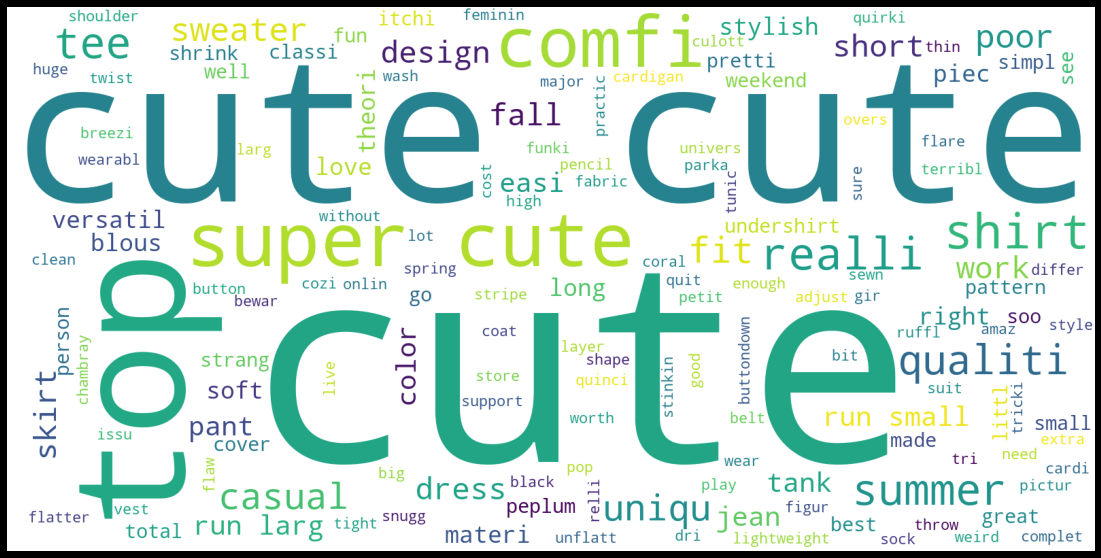

In [ ]:
clust2_titlelist = [item for sublist in clust_title2["title_tokens"] for item in sublist]
clust2_title_bow = ' '.join(clust2_titlelist)
plt.figure(figsize=(20,10),facecolor="k")
plt.imshow(WordCloud(background_color="white",colormap="viridis",width=1600, height=800).generate(clust2_title_bow))
plt.axis("off")
plt.show()

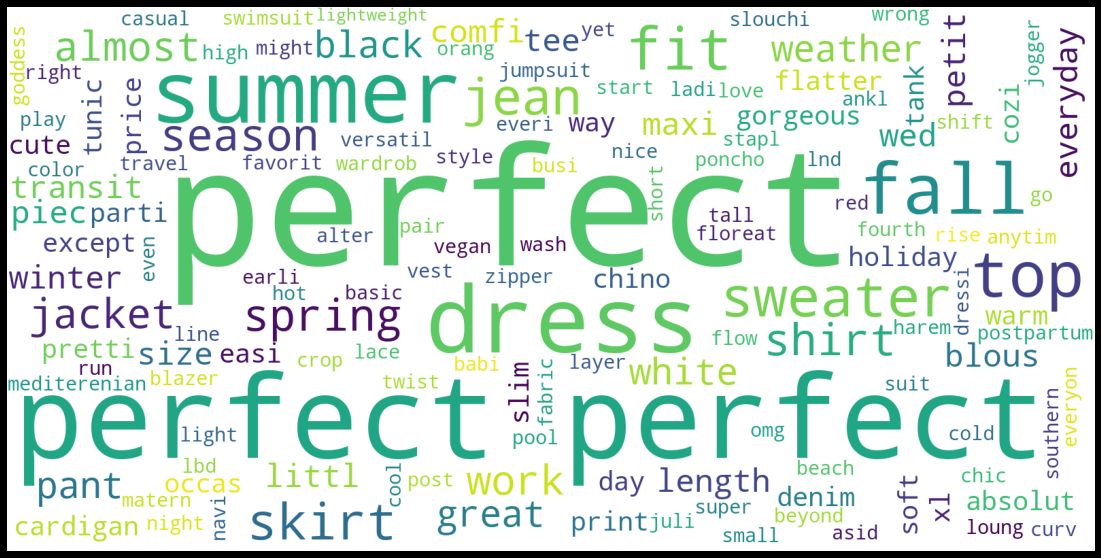

In [ ]:
clust3_titlelist = [item for sublist in clust_title3["title_tokens"] for item in sublist]
clust3_title_bow = ' '.join(clust3_titlelist)
plt.figure(figsize=(20,10),facecolor="k")
plt.imshow(WordCloud(background_color="white",colormap="viridis",width=1600, height=800).generate(clust3_title_bow))
plt.axis("off")
plt.show()

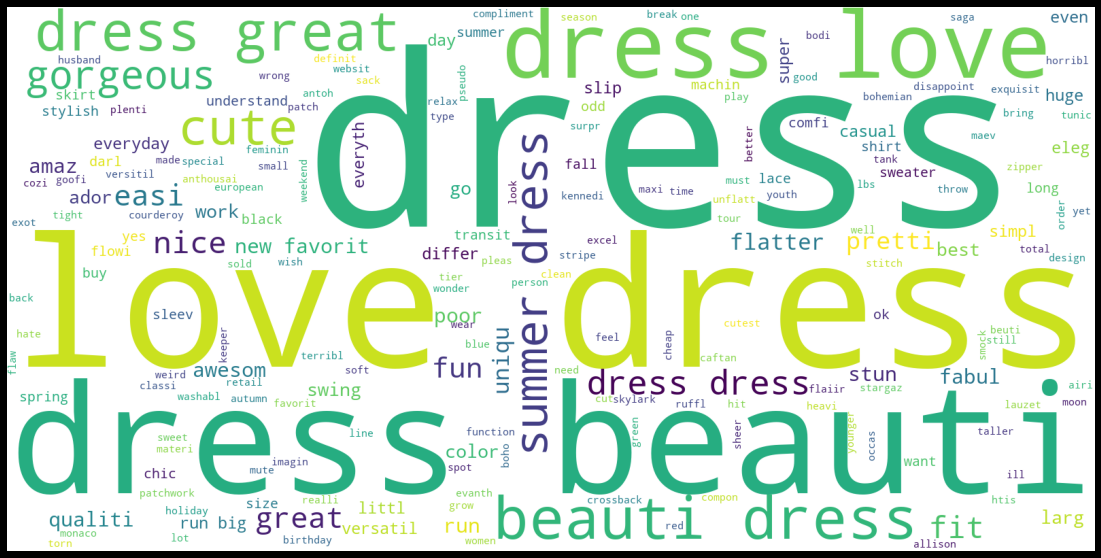

In [ ]:
clust4_titlelist = [item for sublist in clust_title4["title_tokens"] for item in sublist]
clust4_title_bow = ' '.join(clust4_titlelist)
plt.figure(figsize=(20,10),facecolor="k")
plt.imshow(WordCloud(background_color="white",colormap="viridis",width=1600, height=800).generate(clust4_title_bow))
plt.axis("off")
plt.show()

Wordcloud (Review Text)

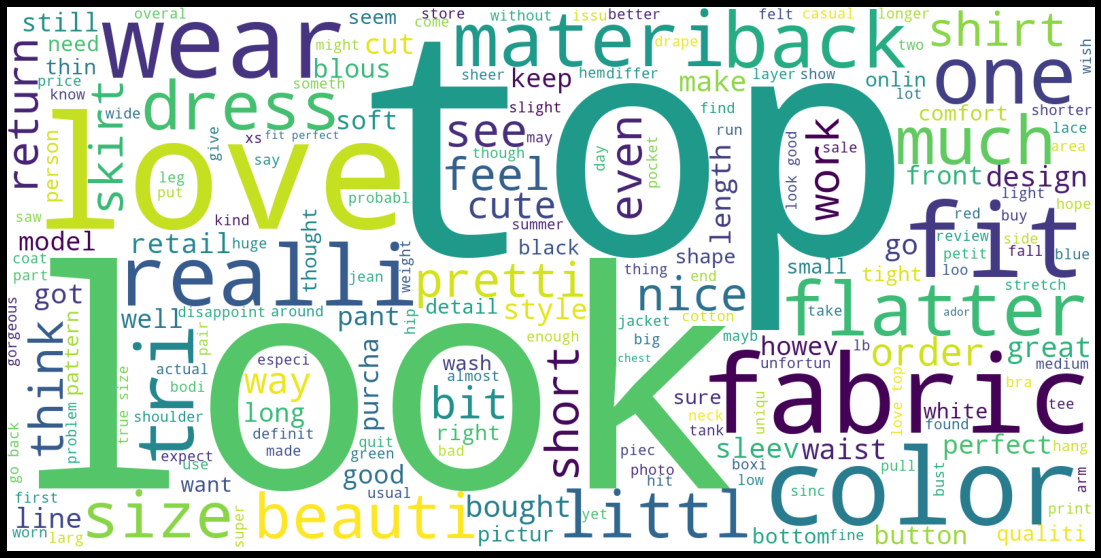

In [ ]:
clust0_textlist = [item for sublist in clust_text0["text_tokens"] for item in sublist]
clust0_text_bow = ' '.join(clust0_textlist)
plt.figure(figsize=(20,10),facecolor="k")
plt.imshow(WordCloud(background_color="white",colormap="viridis",width=1600, height=800).generate(clust0_text_bow))
plt.axis("off")
plt.show()

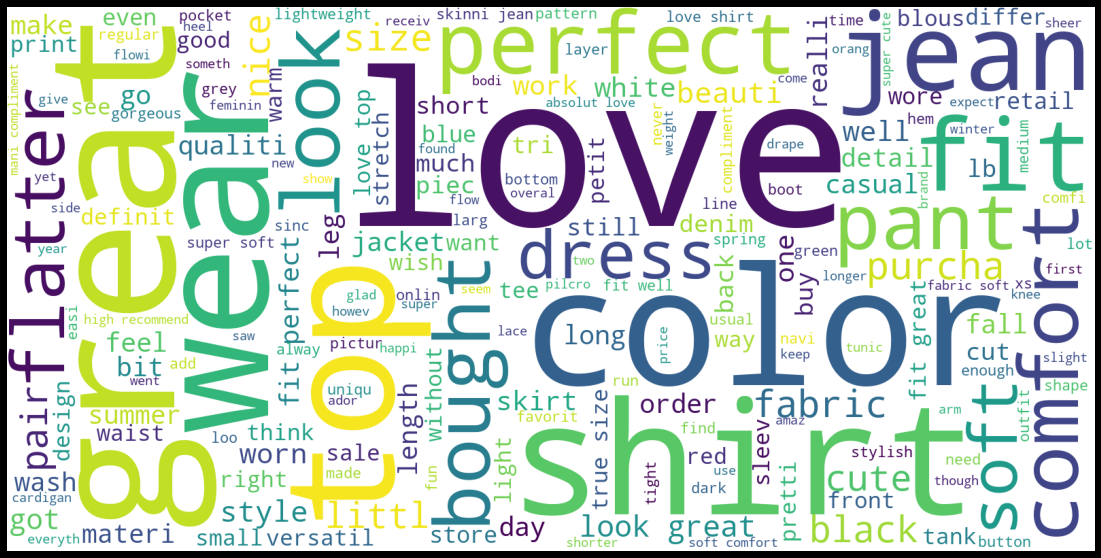

In [ ]:
clust1_textlist = [item for sublist in clust_text1["text_tokens"] for item in sublist]
clust1_text_bow = ' '.join(clust1_textlist)
plt.figure(figsize=(20,10),facecolor="k")
plt.imshow(WordCloud(background_color="white",colormap="viridis",width=1600, height=800).generate(clust1_text_bow))
plt.axis("off")
plt.show()

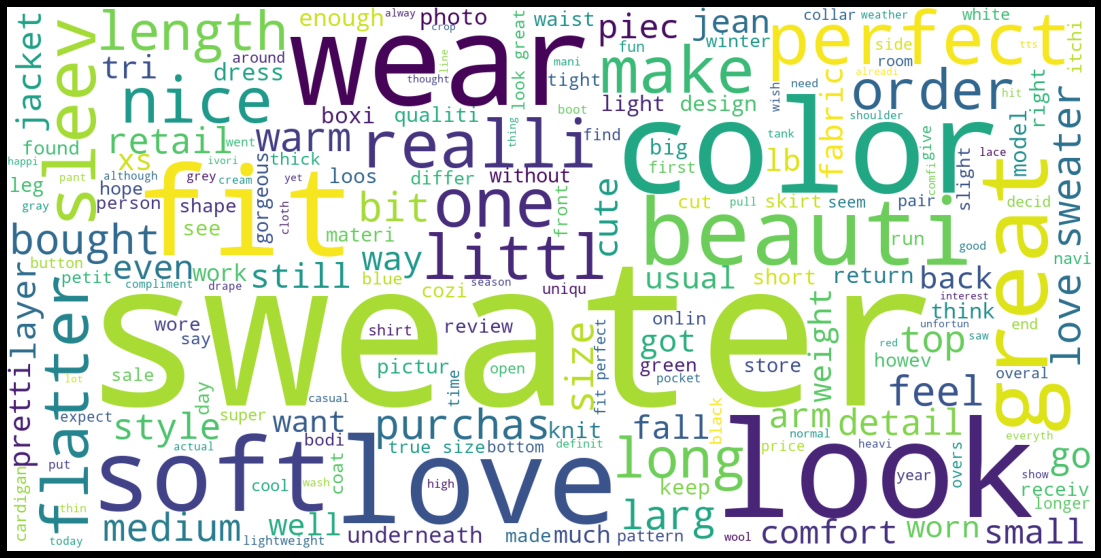

In [ ]:
clust2_textlist = [item for sublist in clust_text2["text_tokens"] for item in sublist]
clust2_text_bow = ' '.join(clust2_textlist)
plt.figure(figsize=(20,10),facecolor="k")
plt.imshow(WordCloud(background_color="white",colormap="viridis",width=1600, height=800).generate(clust2_text_bow))
plt.axis("off")
plt.show()

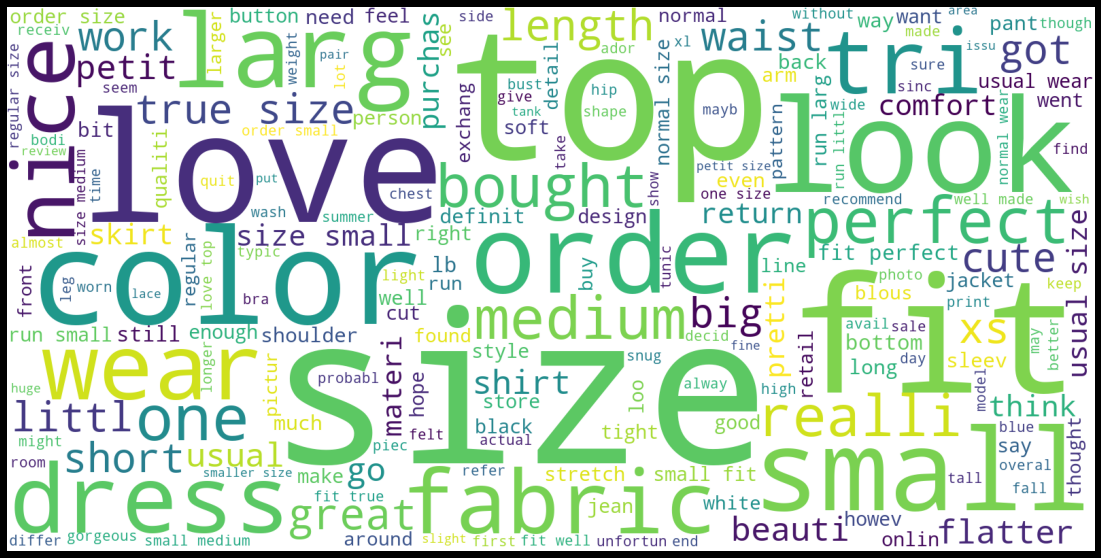

In [ ]:
clust3_textlist = [item for sublist in clust_text3["text_tokens"] for item in sublist]
clust3_text_bow = ' '.join(clust3_textlist)
plt.figure(figsize=(20,10),facecolor="k")
plt.imshow(WordCloud(background_color="white",colormap="viridis",width=1600, height=800).generate(clust3_text_bow))
plt.axis("off")
plt.show()

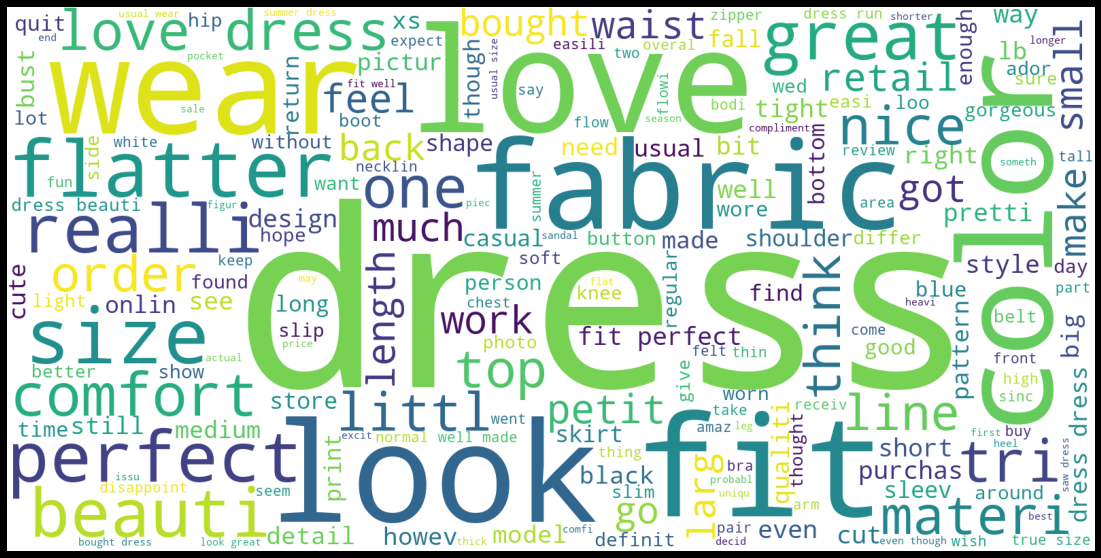

In [ ]:
clust4_textlist = [item for sublist in clust_text4["text_tokens"] for item in sublist]
clust4_text_bow = ' '.join(clust4_textlist)
plt.figure(figsize=(20,10),facecolor="k")
plt.imshow(WordCloud(background_color="white",colormap="viridis",width=1600, height=800).generate(clust4_text_bow))
plt.axis("off")
plt.show()

Frequency Count on "Title" (bar chart)

In [ ]:
import itertools
import collections

In [ ]:
# list of all words across cluster0 tokens
all_title0_tokens = list(itertools.chain(*clust_title0["title_tokens"].tolist()))

# Create counter (title0 tokens only)
counts_title0 = collections.Counter(all_title0_tokens)
counts_title0.most_common(10)

[('love', 550),
 ('great', 391),
 ('beauti', 318),
 ('not', 295),
 ('top', 266),
 ('pretti', 159),
 ('fit', 139),
 ('nice', 129),
 ('color', 123),
 ('run', 110)]

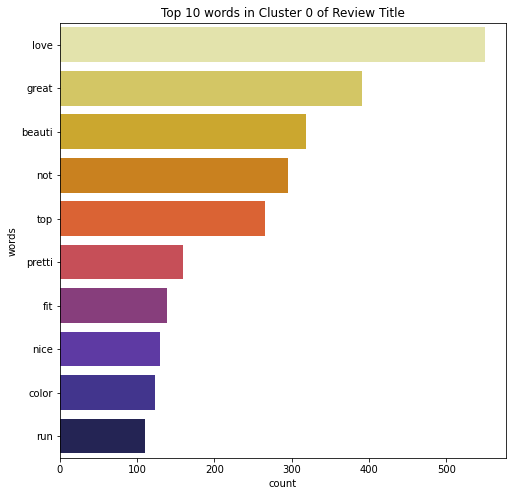

In [ ]:
clust0_title_freq_df = pd.DataFrame(counts_title0.most_common(10), columns = ["words","count"])
#clust0_title_freq_df.head()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Plot the word frequency count (horizontal bar chart)
sns.barplot(x="count", y="words",
            data=clust0_title_freq_df,
            orient = "h", palette=("CMRmap_r"))
plt.title("Top 10 words in Cluster 0 of Review Title")
ax.grid(False)

In [ ]:
# list of all words across cluster1 tokens
all_title1_tokens = list(itertools.chain(*clust_title1["title_tokens"].tolist()))

# Create counter (title1 tokens only)
counts_title1 = collections.Counter(all_title1_tokens)
counts_title1.most_common(10)

[('comfort', 128),
 ('cute', 17),
 ('beauti', 13),
 ('flatter', 13),
 ('super', 9),
 ('top', 8),
 ('style', 7),
 ('dress', 6),
 ('fabric', 5),
 ('great', 5)]

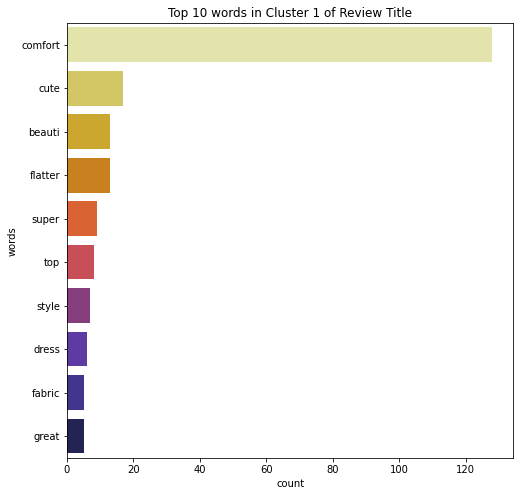

In [ ]:
clust1_title_freq_df = pd.DataFrame(counts_title1.most_common(10), columns = ["words","count"])
#clust1_title_freq_df.head()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Plot the word frequency count (horizontal bar chart)
sns.barplot(x="count", y="words",
            data=clust1_title_freq_df,
            orient = "h", palette=("CMRmap_r"))
plt.title("Top 10 words in Cluster 1 of Review Title")
ax.grid(False)

In [ ]:
# list of all words across cluster2 tokens
all_title2_tokens = list(itertools.chain(*clust_title2["title_tokens"].tolist()))

# Create counter (title2 tokens only)
counts_title2 = collections.Counter(all_title2_tokens)
counts_title2.most_common(10)

[('cute', 327),
 ('top', 44),
 ('super', 39),
 ('comfi', 34),
 ('not', 25),
 ('shirt', 13),
 ('realli', 11),
 ('tee', 10),
 ('summer', 10),
 ('qualiti', 9)]

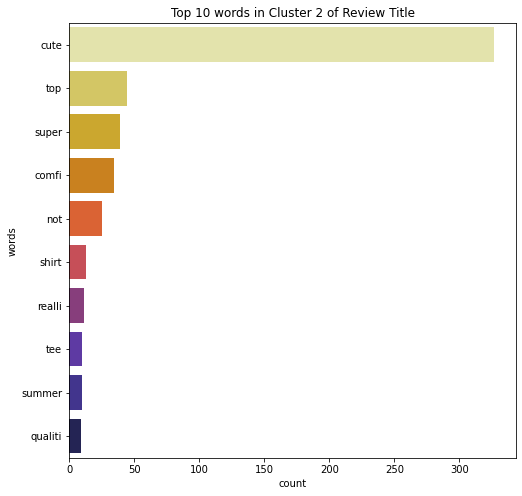

In [ ]:
clust2_title_freq_df = pd.DataFrame(counts_title2.most_common(10), columns = ["words","count"])
#clust2_title_freq_df.head()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Plot the word frequency count (horizontal bar chart)
sns.barplot(x="count", y="words",
            data=clust2_title_freq_df,
            orient = "h", palette=("CMRmap_r"))
plt.title("Top 10 words in Cluster 2 of Review Title")
ax.grid(False)

In [ ]:
# list of all words across cluster3 tokens
all_title3_tokens = list(itertools.chain(*clust_title3["title_tokens"].tolist()))

# Create counter (title3 tokens only)
counts_title3 = collections.Counter(all_title3_tokens)
counts_title3.most_common(10)

[('perfect', 221),
 ('dress', 29),
 ('summer', 26),
 ('fall', 16),
 ('top', 13),
 ('fit', 11),
 ('sweater', 10),
 ('jean', 8),
 ('skirt', 8),
 ('spring', 6)]

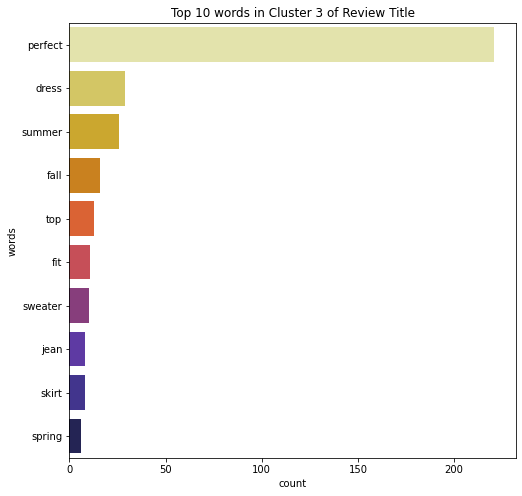

In [ ]:
clust3_title_freq_df = pd.DataFrame(counts_title3.most_common(10), columns = ["words","count"])
#clust3_title_freq_df.head()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Plot the word frequency count (horizontal bar chart)
sns.barplot(x="count", y="words",
            data=clust3_title_freq_df,
            orient = "h", palette=("CMRmap_r"))
plt.title("Top 10 words in Cluster 3 of Review Title")
ax.grid(False)

In [ ]:
# list of all words across cluster4 tokens
all_title4_tokens = list(itertools.chain(*clust_title4["title_tokens"].tolist()))

# Create counter (title4 tokens only)
counts_title4 = collections.Counter(all_title4_tokens)
counts_title4.most_common(10)

[('dress', 366),
 ('love', 60),
 ('beauti', 60),
 ('great', 49),
 ('cute', 31),
 ('summer', 28),
 ('gorgeous', 19),
 ('not', 13),
 ('nice', 11),
 ('fit', 11)]

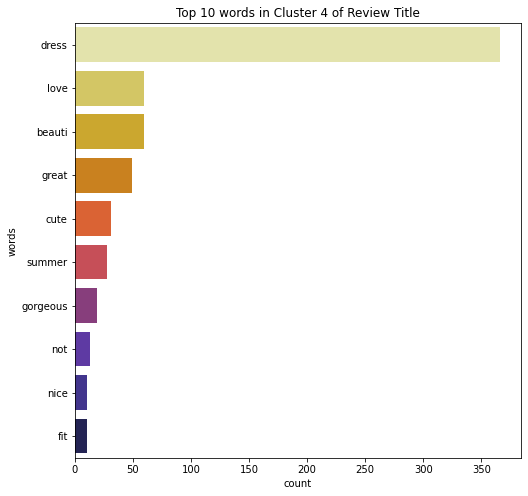

In [ ]:
clust4_title_freq_df = pd.DataFrame(counts_title4.most_common(10), columns = ["words","count"])
#clust4_title_freq_df.head()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Plot the word frequency count (horizontal bar chart)
sns.barplot(x="count", y="words",
            data=clust4_title_freq_df,
            orient = "h", palette=("CMRmap_r"))
plt.title("Top 10 words in Cluster 4 of Review Title")
ax.grid(False)

Frequency Count on "Review Text" (bar chart)

In [ ]:
# list of all words (text) across cluster0 tokens
all_text0_tokens = list(itertools.chain(*clust_text0["text_tokens"].tolist()))

# Create counter (text0 tokens only)
counts_text0 = collections.Counter(all_text0_tokens)
counts_text0.most_common(10)

[('not', 2142),
 ('look', 1023),
 ('like', 1011),
 ('top', 901),
 ('fit', 726),
 ('love', 691),
 ('wear', 565),
 ('color', 562),
 ('would', 554),
 ('fabric', 530)]

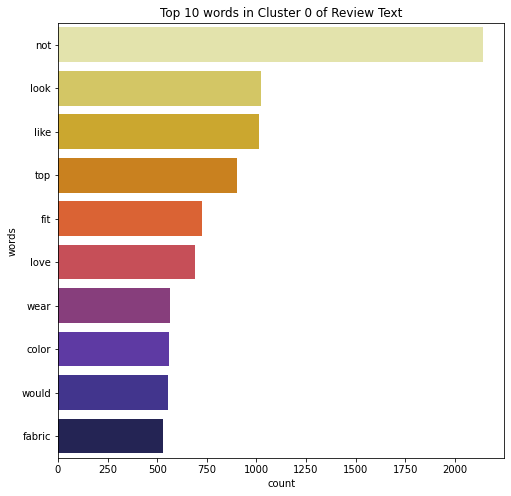

In [ ]:
clust0_text_freq_df = pd.DataFrame(counts_text0.most_common(10), columns = ["words","count"])
#clust0_text_freq_df.head()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Plot the word frequency count (horizontal bar chart)
sns.barplot(x="count", y="words",
            data=clust0_text_freq_df,
            orient = "h", palette=("CMRmap_r"))
plt.title("Top 10 words in Cluster 0 of Review Text")
ax.grid(False)

In [ ]:
# list of all words (text) across cluster1 tokens
all_text1_tokens = list(itertools.chain(*clust_text1["text_tokens"].tolist()))

# Create counter (text1 tokens only)
counts_text1 = collections.Counter(all_text1_tokens)
counts_text1.most_common(10)

[('love', 772),
 ('great', 599),
 ('fit', 506),
 ('wear', 427),
 ('not', 419),
 ('color', 411),
 ('jean', 402),
 ('perfect', 372),
 ('look', 361),
 ('shirt', 358)]

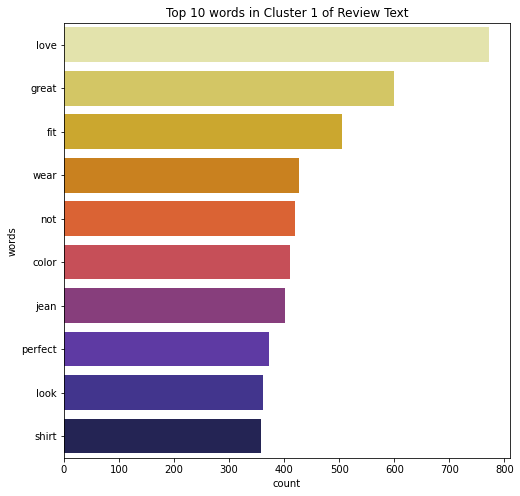

In [ ]:
clust1_text_freq_df = pd.DataFrame(counts_text1.most_common(10), columns = ["words","count"])
#clust1_text_freq_df.head()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Plot the word frequency count (horizontal bar chart)
sns.barplot(x="count", y="words",
            data=clust1_text_freq_df,
            orient = "h", palette=("CMRmap_r"))
plt.title("Top 10 words in Cluster 1 of Review Text")
ax.grid(False)

In [ ]:
# list of all words (text) across cluster2 tokens
all_text2_tokens = list(itertools.chain(*clust_text2["text_tokens"].tolist()))

# Create counter (text2 tokens only)
counts_text2 = collections.Counter(all_text2_tokens)
counts_text2.most_common(10)

[('sweater', 518),
 ('not', 253),
 ('love', 177),
 ('look', 166),
 ('fit', 144),
 ('wear', 141),
 ('color', 138),
 ('like', 103),
 ('soft', 98),
 ('great', 89)]

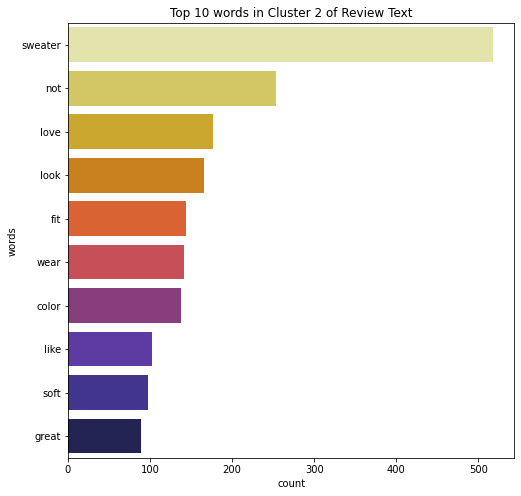

In [ ]:
clust2_text_freq_df = pd.DataFrame(counts_text2.most_common(10), columns = ["words","count"])
#clust2_text_freq_df.head()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Plot the word frequency count (horizontal bar chart)
sns.barplot(x="count", y="words",
            data=clust2_text_freq_df,
            orient = "h", palette=("CMRmap_r"))
plt.title("Top 10 words in Cluster 2 of Review Text")
ax.grid(False)

In [ ]:
# list of all words (text) across cluster3 tokens
all_text3_tokens = list(itertools.chain(*clust_text3["text_tokens"].tolist()))

# Create counter (text3 tokens only)
counts_text3 = collections.Counter(all_text3_tokens)
counts_text3.most_common(10)

[('size', 1299),
 ('fit', 672),
 ('not', 630),
 ('small', 604),
 ('top', 500),
 ('order', 471),
 ('love', 390),
 ('wear', 373),
 ('run', 321),
 ('would', 306)]

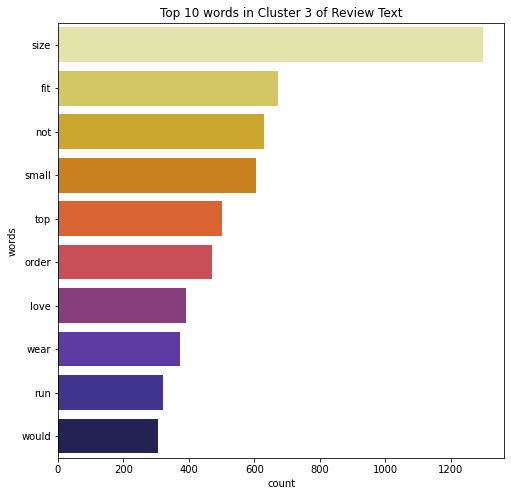

In [ ]:
clust3_text_freq_df = pd.DataFrame(counts_text3.most_common(10), columns = ["words","count"])
#clust3_text_freq_df.head()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Plot the word frequency count (horizontal bar chart)
sns.barplot(x="count", y="words",
            data=clust3_text_freq_df,
            orient = "h", palette=("CMRmap_r"))
plt.title("Top 10 words in Cluster 3 of Review Text")
ax.grid(False)

In [ ]:
# list of all words (text) across cluster4 tokens
all_text4_tokens = list(itertools.chain(*clust_text4["text_tokens"].tolist()))

# Create counter (text4 tokens only)
counts_text4 = collections.Counter(all_text4_tokens)
counts_text4.most_common(10)

[('dress', 2005),
 ('not', 708),
 ('fit', 481),
 ('love', 476),
 ('wear', 346),
 ('look', 344),
 ('size', 339),
 ('like', 318),
 ('perfect', 292),
 ('color', 248)]

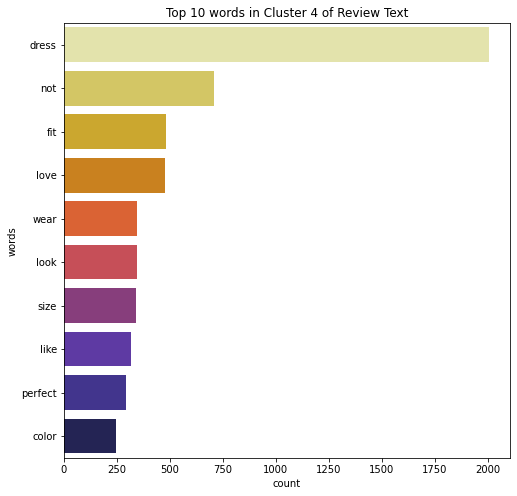

In [ ]:
clust4_text_freq_df = pd.DataFrame(counts_text4.most_common(10), columns = ["words","count"])
#clust4_text_freq_df.head()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Plot the word frequency count (horizontal bar chart)
sns.barplot(x="count", y="words",
            data=clust4_text_freq_df,
            orient = "h", palette=("CMRmap_r"))
plt.title("Top 10 words in Cluster 4 of Review Text")
ax.grid(False)